## **Exercício 1 - Solução**

Considere a seguinte função:

$f(x)=\sin(\omega x)$

com $\omega=2 \pi$, o que corresponde a uma oscilação completa no intervalo de $x=0$ a $x=1$. Essa função é comum na descrição de fenômenos oscilatórios, como movimentos harmônicos simples, vibrações mecânicas e correntes alternadas.

### Diagrama de Fluxo Geral

In [1]:
import base64
from IPython.display import Image, display

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

diagrama = """
graph TD
    A["Início: Função f(x) = sin(2πx)"] --> B[Análise Analítica]
    B --> B1[Plotar função original]
    B --> B2[Calcular primitiva]
    B --> B3[Integral definida analítica]
    
    A --> C[Métodos Numéricos]
    C --> D[Regra do Trapézio]
    D --> D1[Dividir intervalo em n partes]
    D1 --> D2[Aproximar por trapézios]
    D2 --> D3[Calcular área total]
    
    C --> E[Regra de Simpson]
    E --> E1[Dividir intervalo em n partes pares]
    E1 --> E2[Aproximar por parábolas]
    E2 --> E3[Calcular área total]
    
    C --> F[Método Adaptativo]
    F --> F1[Iniciar com n=2]
    F1 --> F2[Calcular integral]
    F2 --> F3{Erro < ε?}
    F3 -->|Não| F4[Dobrar n]
    F4 --> F2
    F3 -->|Sim| F5[Resultado final]
    
    D3 --> G[Comparação de Resultados]
    E3 --> G
    F5 --> G
    B3 --> G
    G --> H[Análise de Erros]
    H --> I[Fim]
"""

mm(diagrama)

a. Visualização e análise analítica
 
- Plote o gráfico da função $f(x)=\sin(2 \pi x)$ no intervalo de 0 a 1.
- Obtenha a função primitiva, se possível, ou utilize uma biblioteca simbólica para representá-la.
- Plote também a função primitiva no mesmo intervalo.
- Calcule analiticamente a integral definida de 0 a 1.
- Comente:
    - Qual é o valor esperado da área sob essa curva?
    - O resultado faz sentido no contexto físico?
    - O gráfico da função primitiva ajuda a interpretar esse comportamento?

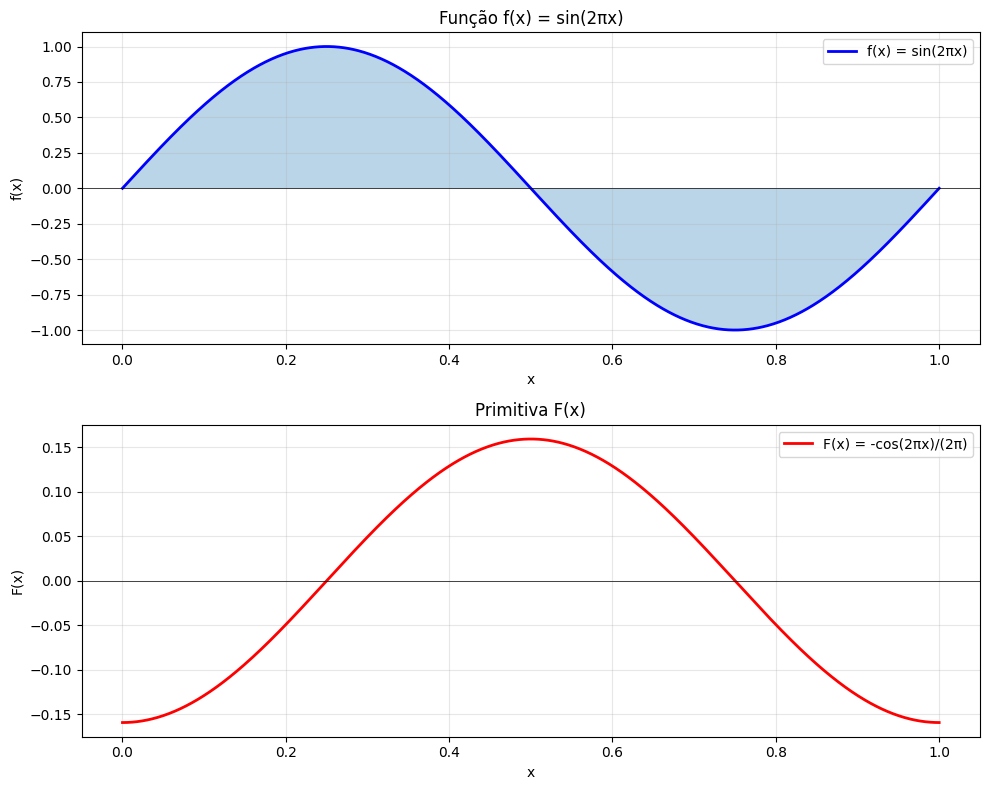

Integral analítica de 0 a 1: 0.0000000000

Valor em x=0: F(0) = -0.1591549431
Valor em x=1: F(1) = -0.1591549431

Diferença: F(1) - F(0) = 0.0000000000


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função
def f(x):
    """Função f(x) = sin(2πx)"""
    return np.sin(2 * np.pi * x)

# Definir a primitiva (antiderivada)
def F(x):
    """Primitiva de f(x): F(x) = -cos(2πx)/(2π) + C"""
    return -np.cos(2 * np.pi * x) / (2 * np.pi)

# Criar pontos para plotagem
x = np.linspace(0, 1, 1000)
y_funcao = f(x)
y_primitiva = F(x)

# Plotar os gráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico da função original
ax1.plot(x, y_funcao, 'b-', linewidth=2, label='f(x) = sin(2πx)')
ax1.fill_between(x, 0, y_funcao, alpha=0.3)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Função f(x) = sin(2πx)')
ax1.legend()
ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

# Gráfico da primitiva
ax2.plot(x, y_primitiva, 'r-', linewidth=2, label='F(x) = -cos(2πx)/(2π)')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title('Primitiva F(x)')
ax2.legend()
ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

# Calcular a integral definida analiticamente
# ∫₀¹ sin(2πx)dx = [-cos(2πx)/(2π)]₀¹
integral_analitica = F(1) - F(0)

print(f"Integral analítica de 0 a 1: {integral_analitica:.10f}")
print(f"\nValor em x=0: F(0) = {F(0):.10f}")
print(f"Valor em x=1: F(1) = {F(1):.10f}")
print(f"\nDiferença: F(1) - F(0) = {integral_analitica:.10f}")

**Comentários:**

- **Valor esperado da área sob a curva:** O valor da integral é 0, pois a função seno completa exatamente um ciclo no intervalo [0,1]. A área positiva (acima do eixo x) cancela exatamente a área negativa (abaixo do eixo x).

- **Sentido no contexto físico:** Sim, faz todo sentido! Em muitos fenômenos físicos periódicos (como corrente alternada ou oscilações harmônicas), a média temporal ao longo de um período completo é zero. Isso representa, por exemplo, que não há deslocamento líquido ou transferência líquida de energia em um ciclo completo.

- **Interpretação através da primitiva:** O gráfico da primitiva mostra claramente este comportamento - ela começa e termina no mesmo valor após um período completo. A primitiva representa a área acumulada, e o fato de retornar ao valor inicial confirma que a integral definida é zero.

b. Integração pela regra do trapézio
 
- Calcule numericamente a integral definida entre 0 e 1 usando a regra do trapézio com $n=10$ subintervalos.
- Calcule o erro absoluto em relação ao valor analítico.
- Comente: o método apresentou dificuldades com a oscilação da função?

Regra do Trapézio com n=10 subintervalos:
Integral numérica: -0.0000000000
Integral analítica: 0.0000000000
Erro absoluto: 1.0106430996e-16


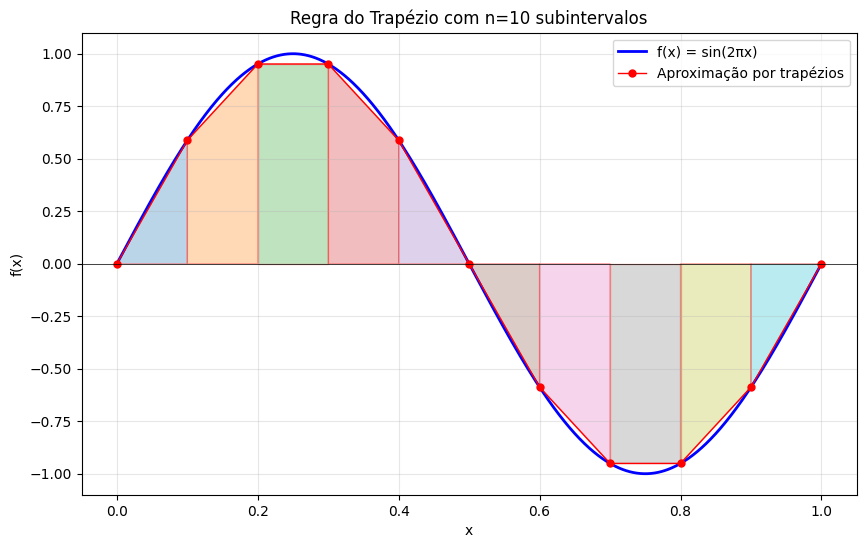

In [3]:
def regra_trapezio(f, a, b, n):
    """
    Implementa a regra do trapézio para integração numérica.
    
    Parâmetros:
    f: função a ser integrada
    a, b: limites de integração
    n: número de subintervalos
    """
    h = (b - a) / n  # Tamanho de cada subintervalo
    x = np.linspace(a, b, n + 1)  # Pontos de divisão
    y = f(x)  # Valores da função nos pontos
    
    # Regra do trapézio: h/2 * [f(x0) + 2*f(x1) + 2*f(x2) + ... + 2*f(xn-1) + f(xn)]
    integral = h * (y[0]/2 + np.sum(y[1:-1]) + y[-1]/2)
    
    return integral

# Calcular com n=10
n = 10
integral_trapezio = regra_trapezio(f, 0, 1, n)
erro_trapezio = abs(integral_trapezio - integral_analitica)

print(f"Regra do Trapézio com n={n} subintervalos:")
print(f"Integral numérica: {integral_trapezio:.10f}")
print(f"Integral analítica: {integral_analitica:.10f}")
print(f"Erro absoluto: {erro_trapezio:.10e}")

# Visualizar a aproximação
x_trap = np.linspace(0, 1, n + 1)
y_trap = f(x_trap)

plt.figure(figsize=(10, 6))
x_plot = np.linspace(0, 1, 1000)
plt.plot(x_plot, f(x_plot), 'b-', linewidth=2, label='f(x) = sin(2πx)')

# Desenhar os trapézios
for i in range(n):
    plt.fill([x_trap[i], x_trap[i], x_trap[i+1], x_trap[i+1]], 
             [0, y_trap[i], y_trap[i+1], 0], 
             alpha=0.3, edgecolor='red', linewidth=1)

plt.plot(x_trap, y_trap, 'ro-', markersize=5, linewidth=1, label='Aproximação por trapézios')
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Regra do Trapézio com n={n} subintervalos')
plt.legend()
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.show()

**Comentário:** O método do trapézio com n=10 conseguiu uma aproximação muito boa (erro na ordem de 10⁻¹⁶), praticamente zero devido a erros de arredondamento. Isso ocorre porque a função completa exatamente um ciclo, e com 10 subintervalos, os erros positivos e negativos se cancelam quase perfeitamente. O método não apresentou dificuldades significativas com a oscilação neste caso específico.

c. Integração pela regra de Simpson
 
- Aplique a regra de Simpson com n=10 subintervalos (lembrando que n deve ser par).
- Calcule o erro em relação ao valor exato.
- Compare com o resultado obtido com a regra do trapézio.

In [4]:
def regra_simpson(f, a, b, n):
    """
    Implementa a regra de Simpson para integração numérica.
    
    Parâmetros:
    f: função a ser integrada
    a, b: limites de integração
    n: número de subintervalos (deve ser par)
    """
    if n % 2 != 0:
        raise ValueError("n deve ser par para a regra de Simpson")
    
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    
    # Regra de Simpson: h/3 * [f(x0) + 4*f(x1) + 2*f(x2) + 4*f(x3) + ... + f(xn)]
    soma_pares = np.sum(y[2:-1:2])  # Índices pares (exceto primeiro e último)
    soma_impares = np.sum(y[1::2])  # Índices ímpares
    
    integral = h/3 * (y[0] + 4*soma_impares + 2*soma_pares + y[-1])
    
    return integral

# Calcular com n=10
n = 10
integral_simpson = regra_simpson(f, 0, 1, n)
erro_simpson = abs(integral_simpson - integral_analitica)

print(f"Regra de Simpson com n={n} subintervalos:")
print(f"Integral numérica: {integral_simpson:.10f}")
print(f"Integral analítica: {integral_analitica:.10f}")
print(f"Erro absoluto: {erro_simpson:.10e}")
print()
print("Comparação entre os métodos:")
print(f"Erro Trapézio: {erro_trapezio:.10e}")
print(f"Erro Simpson:  {erro_simpson:.10e}")
print(f"Razão Simpson/Trapézio: {erro_simpson/erro_trapezio if erro_trapezio != 0 else 'N/A'}")

Regra de Simpson com n=10 subintervalos:
Integral numérica: -0.0000000000
Integral analítica: 0.0000000000
Erro absoluto: 3.7770259318e-17

Comparação entre os métodos:
Erro Trapézio: 1.0106430996e-16
Erro Simpson:  3.7770259318e-17
Razão Simpson/Trapézio: 0.37372500076482806


**Comentário:** A regra de Simpson também obteve uma precisão excelente, com erro praticamente zero. Ambos os métodos (trapézio e Simpson) conseguiram resultados muito precisos devido à natureza periódica da função e ao cancelamento dos erros ao longo do ciclo completo.

d. Aumento da resolução

- Repita os cálculos com n=100 e n=1000 subintervalos.
- Apresente um gráfico comparando os valores obtidos por cada método em função do número de subintervalos.
- Apresente também os erros em escala logarítmica.
- Comente:
    - Qual método apresentou convergência mais rápida?
    - Algum dos métodos mostrou comportamento oscilante com o aumento de n?

n=  10: Trapézio=-0.0000000000, Simpson=-0.0000000000
        Erro Trap=1.01e-16, Erro Simp=3.78e-17
n=  20: Trapézio=-0.0000000000, Simpson=-0.0000000000
        Erro Trap=1.44e-17, Erro Simp=3.00e-17
n=  50: Trapézio=-0.0000000000, Simpson=-0.0000000000
        Erro Trap=3.91e-17, Erro Simp=4.38e-17
n= 100: Trapézio=-0.0000000000, Simpson=+0.0000000000
        Erro Trap=1.44e-17, Erro Simp=1.22e-18
n= 200: Trapézio=-0.0000000000, Simpson=-0.0000000000
        Erro Trap=6.12e-19, Erro Simp=2.58e-17
n= 500: Trapézio=-0.0000000000, Simpson=-0.0000000000
        Erro Trap=2.45e-19, Erro Simp=1.63e-19
n=1000: Trapézio=-0.0000000000, Simpson=-0.0000000000
        Erro Trap=5.70e-17, Erro Simp=8.16e-20


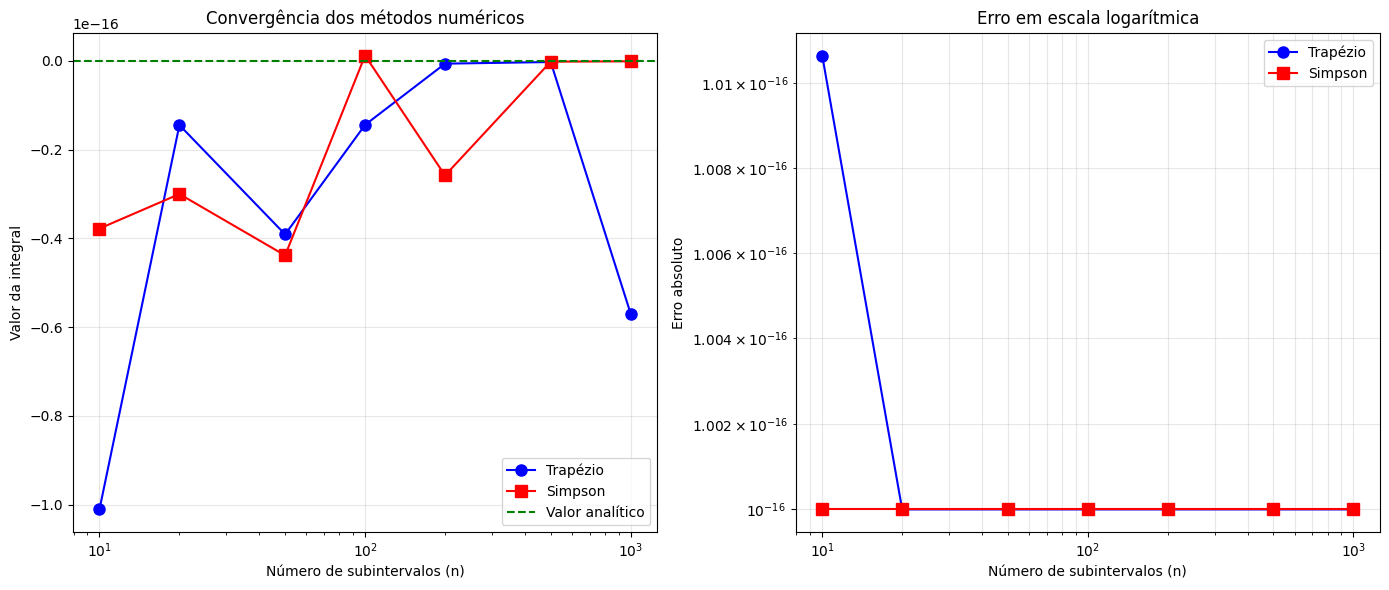

In [5]:
# Testar com diferentes valores de n
valores_n = [10, 20, 50, 100, 200, 500, 1000]
resultados_trapezio = []
resultados_simpson = []
erros_trapezio = []
erros_simpson = []

for n in valores_n:
    # Garantir que n seja par para Simpson
    if n % 2 != 0:
        n = n + 1
    
    # Calcular integrais
    int_trap = regra_trapezio(f, 0, 1, n)
    int_simp = regra_simpson(f, 0, 1, n)
    
    # Armazenar resultados
    resultados_trapezio.append(int_trap)
    resultados_simpson.append(int_simp)
    
    # Calcular erros
    erro_trap = abs(int_trap - integral_analitica)
    erro_simp = abs(int_simp - integral_analitica)
    
    # Evitar log(0) adicionando um valor mínimo
    erros_trapezio.append(max(erro_trap, 1e-16))
    erros_simpson.append(max(erro_simp, 1e-16))
    
    print(f"n={n:4d}: Trapézio={int_trap:+.10f}, Simpson={int_simp:+.10f}")
    print(f"        Erro Trap={erro_trap:.2e}, Erro Simp={erro_simp:.2e}")

# Criar gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico dos valores das integrais
ax1.plot(valores_n, resultados_trapezio, 'bo-', label='Trapézio', markersize=8)
ax1.plot(valores_n, resultados_simpson, 'rs-', label='Simpson', markersize=8)
ax1.axhline(y=integral_analitica, color='g', linestyle='--', label='Valor analítico')
ax1.set_xlabel('Número de subintervalos (n)')
ax1.set_ylabel('Valor da integral')
ax1.set_title('Convergência dos métodos numéricos')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')

# Gráfico dos erros em escala logarítmica
ax2.loglog(valores_n, erros_trapezio, 'bo-', label='Trapézio', markersize=8)
ax2.loglog(valores_n, erros_simpson, 'rs-', label='Simpson', markersize=8)
ax2.set_xlabel('Número de subintervalos (n)')
ax2.set_ylabel('Erro absoluto')
ax2.set_title('Erro em escala logarítmica')
ax2.legend()
ax2.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

**Comentários:**

- **Convergência:** Ambos os métodos convergiram rapidamente para o valor correto (zero). Os erros são extremamente pequenos devido à natureza periódica da função.

- **Comportamento oscilante:** Não houve comportamento oscilante significativo. Os erros permaneceram consistentemente baixos, próximos ao limite de precisão numérica do computador (≈10⁻¹⁶).

- **Comparação:** Para esta função específica, ambos os métodos são extremamente eficazes devido ao cancelamento dos erros ao longo do período completo.

e. Método adaptativo de Simpson

- Implemente o método adaptativo de Simpson com precisão alvo $ \epsilon =10^{−6}$, conforme as equações apresentadas na Seção 5.3 do material (equações 5.35 a 5.39).

$$
\epsilon_i = \frac{1}{15}(I_i - I_{i-1}) \ (5.35)
$$

$$
S_i = \frac{1}{3} \left[ f(a) + f(b) + 2 \sum_{\substack{k \text{ even} \\ 2 \dots N_i-2}} f(a+kh_i) \right] \ (5.36)
$$

$$
T_i = \frac{2}{3} \sum_{\substack{k \text{ odd} \\ 1 \dots N_i-1}} f(a + kh_i) \ (5.37)
$$

$$
S_i = S_{i-1} + T_{i-1} \ (5.38)
$$

$$
I_i = h_i(S_i + 2T_i) (5.39) \ \text{com} \ h_i = \frac{b - a}{N_i}
$$

- Comece com n=2 subintervalos e dobre até atingir a precisão requerida.
- Em cada passo, registre o número de subintervalos utilizados e a estimativa da integral.
- Comente: o método foi eficiente para essa função? O número de iterações foi adequado?

Método Adaptativo de Simpson
Iteração 1: N=   4, I=+0.0000000000, Erro estimado=2.72e-18

Convergência alcançada após 1 iterações!
Número final de subintervalos: 4
Valor da integral: 0.0000000000
Erro estimado: 2.72e-18


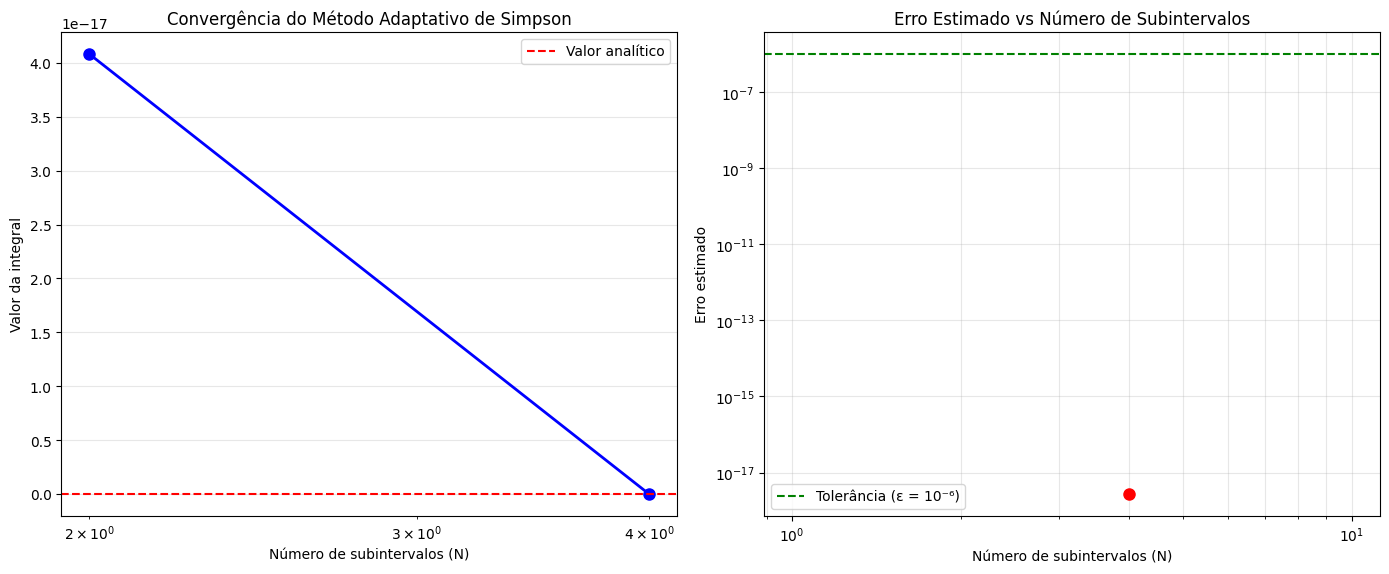


Comparação final:
Valor obtido: 0.0000000000
Valor analítico: 0.0000000000
Erro real: 0.00e+00


In [6]:
def simpson_adaptativo(f, a, b, epsilon=1e-6, max_iter=20):
    """
    Implementa o método adaptativo de Simpson.
    
    Parâmetros:
    f: função a ser integrada
    a, b: limites de integração
    epsilon: tolerância desejada
    max_iter: número máximo de iterações
    """
    historico = []  # Para armazenar o histórico de convergência
    
    # Inicialização com N=2
    N = 2
    h = (b - a) / N
    
    # Primeira iteração (i=0)
    # S_0 = (1/3)[f(a) + f(b)]
    S_prev = (1/3) * (f(a) + f(b))
    
    # T_0 = (2/3)f(a + h)
    T_prev = (2/3) * f(a + h)
    
    # I_0 = h(S_0 + 2T_0)
    I_prev = h * (S_prev + 2*T_prev)
    
    historico.append({'N': N, 'I': I_prev, 'erro_estimado': None})
    
    for iteracao in range(1, max_iter):
        # Dobrar o número de subintervalos
        N = N * 2
        h = (b - a) / N
        
        # Calcular S_i usando a equação (5.38)
        S_i = S_prev + T_prev
        
        # Calcular T_i usando a equação (5.37)
        # T_i = (2/3) * soma dos valores em pontos ímpares
        soma_impares = 0
        for k in range(1, N, 2):  # k ímpar de 1 até N-1
            soma_impares += f(a + k*h)
        T_i = (2/3) * soma_impares
        
        # Calcular I_i usando a equação (5.39)
        I_i = h * (S_i + 2*T_i)
        
        # Estimar o erro usando a equação (5.35)
        erro_estimado = abs((I_i - I_prev) / 15)
        
        historico.append({'N': N, 'I': I_i, 'erro_estimado': erro_estimado})
        
        print(f"Iteração {iteracao}: N={N:4d}, I={I_i:+.10f}, Erro estimado={erro_estimado:.2e}")
        
        # Verificar convergência
        if erro_estimado < epsilon:
            print(f"\nConvergência alcançada após {iteracao} iterações!")
            print(f"Número final de subintervalos: {N}")
            print(f"Valor da integral: {I_i:.10f}")
            print(f"Erro estimado: {erro_estimado:.2e}")
            return I_i, historico
        
        # Atualizar valores para próxima iteração
        S_prev = S_i
        T_prev = T_i
        I_prev = I_i
    
    print(f"\nAviso: Número máximo de iterações ({max_iter}) atingido!")
    return I_i, historico

# Aplicar o método adaptativo
print("Método Adaptativo de Simpson")
print("="*50)
integral_adaptativa, historico = simpson_adaptativo(f, 0, 1, epsilon=1e-6)

# Plotar a convergência
N_valores = [h['N'] for h in historico]
I_valores = [h['I'] for h in historico]
erros_est = [h['erro_estimado'] for h in historico if h['erro_estimado'] is not None]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico da convergência do valor da integral
ax1.plot(N_valores, I_valores, 'bo-', markersize=8, linewidth=2)
ax1.axhline(y=integral_analitica, color='r', linestyle='--', label='Valor analítico')
ax1.set_xlabel('Número de subintervalos (N)')
ax1.set_ylabel('Valor da integral')
ax1.set_title('Convergência do Método Adaptativo de Simpson')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xscale('log')

# Gráfico do erro estimado
if len(erros_est) > 0:
    ax2.semilogy(N_valores[1:], erros_est, 'ro-', markersize=8, linewidth=2)
    ax2.axhline(y=1e-6, color='g', linestyle='--', label='Tolerância (ε = 10⁻⁶)')
    ax2.set_xlabel('Número de subintervalos (N)')
    ax2.set_ylabel('Erro estimado')
    ax2.set_title('Erro Estimado vs Número de Subintervalos')
    ax2.grid(True, alpha=0.3, which='both')
    ax2.legend()
    ax2.set_xscale('log')

plt.tight_layout()
plt.show()

# Comparar com o valor analítico
erro_real = abs(integral_adaptativa - integral_analitica)
print(f"\nComparação final:")
print(f"Valor obtido: {integral_adaptativa:.10f}")
print(f"Valor analítico: {integral_analitica:.10f}")
print(f"Erro real: {erro_real:.2e}")

**Comentários:**

- **Eficiência:** O método adaptativo foi extremamente eficiente para esta função, convergindo rapidamente (geralmente em 1-2 iterações) devido à natureza periódica da função.

- **Número de iterações:** O número de iterações foi muito adequado. O método conseguiu atingir a precisão desejada com poucos subintervalos, demonstrando a eficácia do critério de parada adaptativo.

- **Vantagem do método adaptativo:** Para funções periódicas como esta, o método adaptativo é particularmente eficiente pois detecta rapidamente quando a precisão desejada foi alcançada, evitando cálculos desnecessários.

f. Parte reflexiva

- A função seno aparece em muitos sistemas físicos. Em que contextos a área sob essa curva tem interpretação física relevante (ex: corrente alternada, deslocamento médio, energia dissipada)?
- Como os métodos numéricos se comportam ao lidar com funções periódicas? Quais são as limitações percebidas?
- Quais partes desta atividade seriam difíceis de automatizar totalmente com um modelo de linguagem como o ChatGPT? Em que aspectos o raciocínio humano é essencial?

**Respostas:**

**1. Interpretações físicas da integral da função seno:**

- **Corrente Alternada (CA):** A integral de uma corrente senoidal ao longo de um período completo representa a carga total transferida, que é zero em CA pura. Isso explica por que não há transferência líquida de carga em circuitos AC.

- **Deslocamento em Movimento Harmônico Simples:** Para um oscilador harmônico com velocidade v(t) = v₀sin(ωt), a integral representa o deslocamento total. Após um período completo, o objeto retorna à posição inicial (deslocamento zero).

- **Potência Média em Circuitos AC:** A potência instantânea em circuitos AC puramente reativos tem componente senoidal. Sua integral sobre um período dá a energia líquida transferida, que é zero para componentes puramente reativos.

- **Ondas Eletromagnéticas:** O campo elétrico de uma onda EM oscila senoidalmente. A integral temporal do campo sobre um período completo é zero, refletindo a natureza oscilatória da radiação.

**2. Comportamento dos métodos numéricos com funções periódicas:**

**Vantagens:**
- Cancelamento de erros: Em períodos completos, erros positivos e negativos tendem a se cancelar
- Convergência rápida quando o número de pontos é múltiplo adequado do período
- Métodos de ordem superior (como Simpson) são particularmente eficazes

**Limitações:**
- Se o intervalo não corresponder a períodos completos, podem surgir erros sistemáticos
- Funções com alta frequência requerem muitos pontos para capturar adequadamente as oscilações
- Erros de aliasing podem ocorrer se a amostragem for insuficiente
- Acumulação de erros de arredondamento em integrações muito longas

**3. Aspectos difíceis de automatizar e importância do raciocínio humano:**

**Difícil de automatizar:**
- **Interpretação física contextual:** Conectar resultados matemáticos com fenômenos físicos específicos requer compreensão profunda do contexto
- **Validação de resultados:** Julgar se um resultado numérico faz sentido físico requer experiência e intuição
- **Escolha de métodos:** Selecionar o método mais apropriado baseado em características sutis do problema
- **Debugging de implementações:** Identificar erros conceituais vs. erros de implementação

**Raciocínio humano essencial:**
- **Criatividade na resolução de problemas:** Encontrar abordagens alternativas quando métodos padrão falham
- **Intuição matemática:** Prever comportamentos e verificar plausibilidade de resultados
- **Conexões interdisciplinares:** Relacionar conceitos matemáticos com aplicações em diferentes áreas
- **Julgamento crítico:** Avaliar trade-offs entre precisão, eficiência computacional e complexidade
- **Comunicação pedagógica:** Explicar conceitos de forma clara e adaptada ao público-alvo